 # **Loan Default Risk with Business Cost Optimization**

Predict the likelihood of a loan default and optimize the decision threshold based on cost-benefit analysis.

In [1]:
#  Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
 #Load the dataset
df = pd.read_csv("/content/application_train.csv")  # adjust filename if needed

In [3]:
 #View first few rows
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
 #Check null values
df.isnull().sum().sort_values(ascending=False)


,0
COMMONAREA_AVG,6755
COMMONAREA_MODE,6755
COMMONAREA_MEDI,6755
NONLIVINGAPARTMENTS_MEDI,6720
NONLIVINGAPARTMENTS_MODE,6720
...,...
REGION_POPULATION_RELATIVE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0
NAME_EDUCATION_TYPE,0


In [5]:
#Drop columns with more than 40% nulls
null_thresh = len(df) * 0.4
df = df.dropna(thresh=null_thresh, axis=1)


In [7]:
 #Fill remaining nulls with median for numerical, mode for categorical
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

/tmp/ipython-input-7-1989998457.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-7-1989998457.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [8]:
 #Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

In [9]:
#Confirm cleaned data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9692 entries, 0 to 9691
Columns: 206 entries, SK_ID_CURR to EMERGENCYSTATE_MODE_Yes
dtypes: bool(116), float64(87), int64(3)
memory usage: 7.7 MB


In [10]:
 #Check target distribution
df['TARGET'].value_counts(normalize=True)

,proportion
TARGET,
0,0.922101
1,0.077899


In [11]:
#Separate X and y
X = df.drop("TARGET", axis=1)
y = df["TARGET"]

## **Train/Test Split & Model Training**

In [12]:
#Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


## **Logistic Regression**

In [13]:
 #Logistic Regression
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

## **CatBoost Classifier**

In [17]:
#CatBoost Classifier
!pip install catboost

from catboost import CatBoostClassifier


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.5 MB/s eta 0:00:00


In [18]:
cat_model = CatBoostClassifier(verbose=0)
cat_model.fit(X_train, y_train)

In [19]:
#Predict probabilities
log_probs = log_model.predict_proba(X_test)[:, 1]
cat_probs = cat_model.predict_proba(X_test)[:, 1]

In [20]:
#Evaluate using ROC AUC
from sklearn.metrics import roc_auc_score
print("Logistic AUC:", roc_auc_score(y_test, log_probs))
print("CatBoost AUC:", roc_auc_score(y_test, cat_probs))

Logistic AUC: 0.6161162718343037
CatBoost AUC: 0.7232469591241093


 ## **Plot ROC curve**

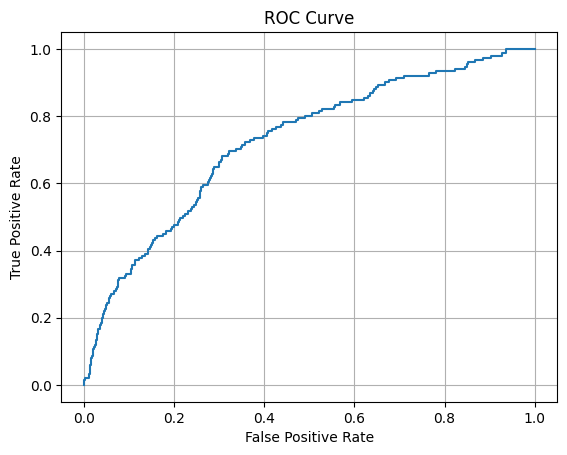

In [21]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, cat_probs)
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.show()


In [22]:
#Check confusion matrix at 0.5 threshold
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, cat_probs >= 0.5)

array([[1782,    6],
       [ 148,    3]])

<Axes: >

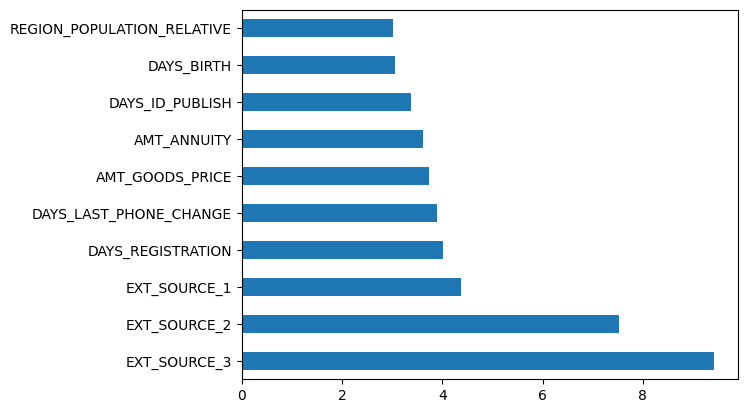

In [23]:
#feature importance (CatBoost)
feat_imp = pd.Series(cat_model.feature_importances_, index=X.columns).sort_values(ascending=False)
feat_imp.head(10).plot(kind='barh')

In [24]:
#|Select top 20 features
top_features = feat_imp.head(20).index
X_train = X_train[top_features]
X_test = X_test[top_features]

In [25]:
#Retrain with top features
cat_model.fit(X_train, y_train)

## **Business Cost-Based Thresholding**

In [26]:
#Predict probabilities again
cat_probs = cat_model.predict_proba(X_test)[:, 1]

In [27]:
 #Define business cost parameters
cost_fp = 10000  # loan given to defaulter
cost_fn = 2000   # rejected good customer

In [28]:
#Function to calculate business cost
def calculate_cost(y_true, y_prob, threshold, cost_fp, cost_fn):
    y_pred = (y_prob >= threshold).astype(int)
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    total_cost = (fp * cost_fp) + (fn * cost_fn)
    return total_cost

In [29]:
#Generate thresholds
thresholds = np.linspace(0.1, 0.9, 100)
costs = [calculate_cost(y_test, cat_probs, t, cost_fp, cost_fn) for t in thresholds]


## **Plot threshold vs. cost**

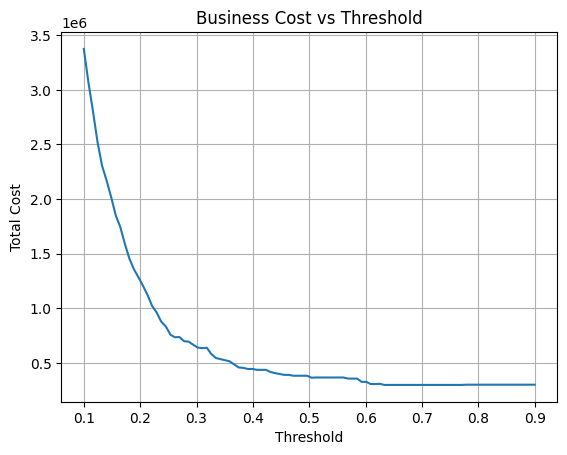

In [30]:
#Plot threshold vs. cost
plt.plot(thresholds, costs)
plt.title("Business Cost vs Threshold")
plt.xlabel("Threshold")
plt.ylabel("Total Cost")
plt.grid()
plt.show()

In [31]:
#Best threshold
best_threshold = thresholds[np.argmin(costs)]
print("Best Threshold:", best_threshold)


Best Threshold: 0.6333333333333333


In [32]:
#Confusion matrix at optimal threshold
y_pred_opt = (cat_probs >= best_threshold).astype(int)
cm = confusion_matrix(y_test, y_pred_opt)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[1788    0]
 [ 150    1]]


In [33]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_opt))


              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1788
           1       1.00      0.01      0.01       151

    accuracy                           0.92      1939
   macro avg       0.96      0.50      0.49      1939
weighted avg       0.93      0.92      0.89      1939



In [34]:
# Save model
import joblib
joblib.dump(cat_model, "catboost_model.pkl")


['catboost_model.pkl']

In [36]:
#Save best threshold
with open("best_threshold.txt", "w") as f:
    f.write(str(best_threshold))

 ## **Plot Feature Importance**

<Axes: title={'center': 'Feature Importance'}>

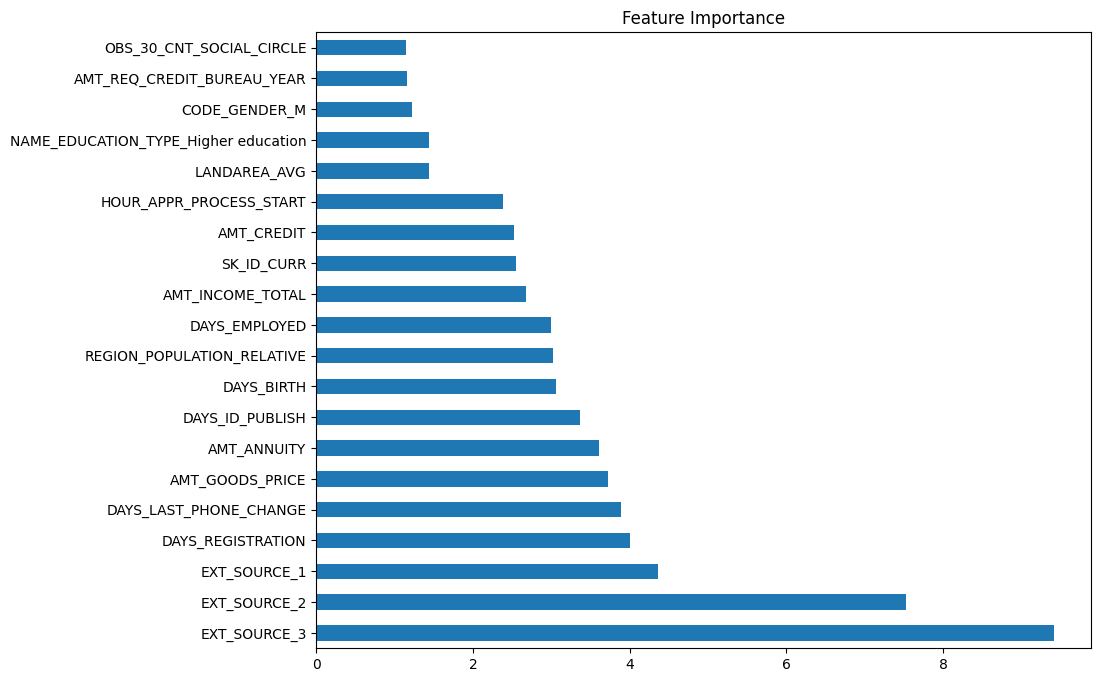

In [38]:
feat_imp[top_features].plot(kind="barh", figsize=(10,8), title="Feature Importance")


 ## **Visualize confusion matrix**

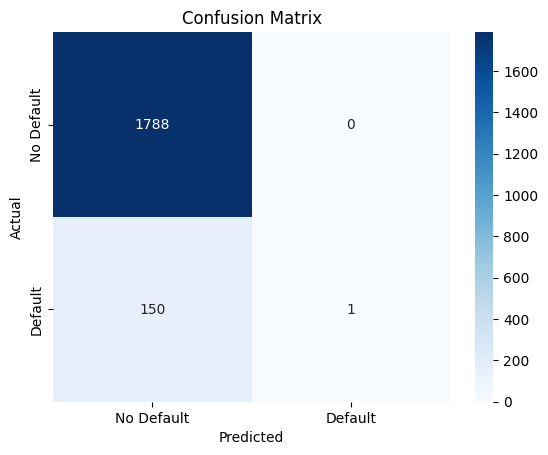

In [39]:
 #Visualize confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [40]:
#Export predictions
results = pd.DataFrame({
    "Actual": y_test,
    "Predicted_Prob": cat_probs,
    "Predicted_Label": y_pred_opt
})
results.to_csv("loan_predictions.csv", index=False)

In [41]:
#Print cost difference from threshold 0.5
default_cost = calculate_cost(y_test, cat_probs, 0.5, cost_fp, cost_fn)
optimal_cost = calculate_cost(y_test, cat_probs, best_threshold, cost_fp, cost_fn)
print(f"Cost @ 0.5 = {default_cost}, Optimal = {optimal_cost}, Saved = {default_cost - optimal_cost}")


Cost @ 0.5 = 386000, Optimal = 300000, Saved = 86000


## **Plot actual vs predicted probabilities**

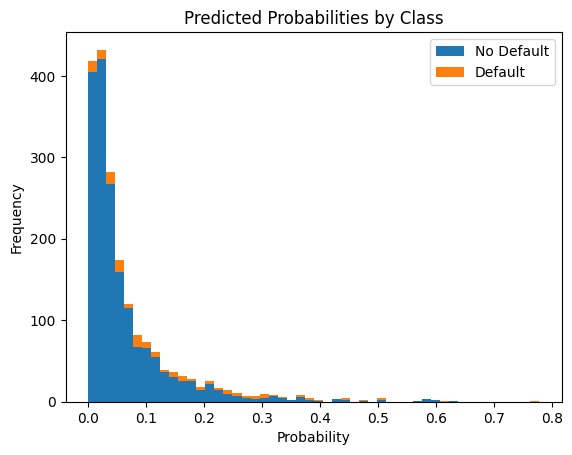

In [42]:

plt.hist([cat_probs[y_test==0], cat_probs[y_test==1]], bins=50, stacked=True, label=["No Default", "Default"])
plt.legend()
plt.title("Predicted Probabilities by Class")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.show()

In [43]:
 #MAE, RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MAE:", mean_absolute_error(y_test, cat_probs))
print("RMSE:", np.sqrt(mean_squared_error(y_test, cat_probs)))

MAE: 0.12397810510929466
RMSE: 0.2588435976186154


## **Risk Score Distribution**

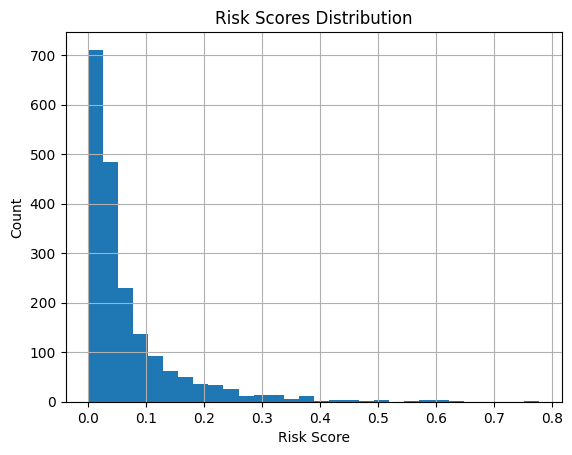

In [44]:

plt.hist(cat_probs, bins=30)
plt.title("Risk Scores Distribution")
plt.xlabel("Risk Score")
plt.ylabel("Count")
plt.grid()
plt.show()

In [45]:
#Save cleaned data
df.to_csv("cleaned_loan_data.csv", index=False)

In [46]:
 #Note business insights
print("Business Insight: Optimal threshold minimizes cost of wrong predictions (false loans vs missed customers).")


Business Insight: Optimal threshold minimizes cost of wrong predictions (false loans vs missed customers).


In [47]:
#Package all outputs
import zipfile
with zipfile.ZipFile("loan_risk_outputs.zip", 'w') as zipf:
    zipf.write("catboost_model.pkl")
    zipf.write("loan_predictions.csv")
    zipf.write("best_threshold.txt")
    zipf.write("cleaned_loan_data.csv")